# Models Forward Kinematics

## Imports

In [ ]:
import os
from utils import *
import numpy as np
from tensorflow.keras.models import load_model

## I - Loading the models

In [11]:
models_dir = 'models'
MODELS_2R = []
MODELS_3R = []
MODELS_5R = []

if os.path.exists(models_dir) and os.path.isdir(models_dir):
    for filename in os.listdir(models_dir):
        filepath = os.path.join(models_dir, filename)
        if os.path.isfile(filepath) and filename.endswith('.keras'):
            if '2R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"2R Model found : {filename}")
                MODELS_2R.append(model)
            elif '3R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"3R Model found : {filename}")
                MODELS_3R.append(model)
            elif '5R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"5R Model found : {filename}")
                MODELS_5R.append(model)
else:
    print(f"The folder '{models_dir}' does not exists!")


print(f"Number of 2R models : {len(MODELS_2R)}")
print(f"Number of 3R models : {len(MODELS_3R)}")
print(f"Number of 5R models : {len(MODELS_5R)}")

5R Model found : NN1_5R_p80_e20.keras
3R Model found : NN1_3R_p10_e20.keras
2R Model found : NN1_2R_p10_e20.keras
Number of 2R models : 1
Number of 3R models : 1
Number of 5R models : 1


## II - Direct Kinematics & Jacobian Matrix

### 2.1) 2R robot

Example with (j0, j1) = (0, 0)
End-effector predicted X-position: 0.2068241834640503
End-effector predicted Y-position: 0.004642123356461525


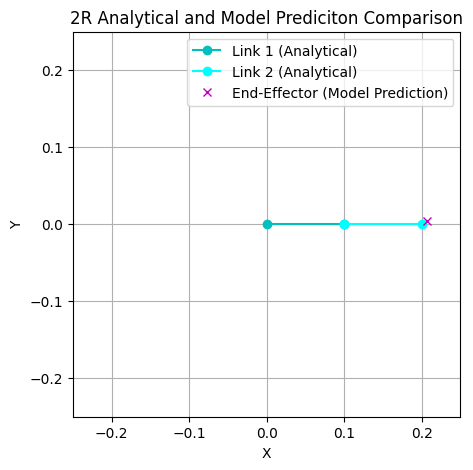

Distance error: 0.0082534107620803

Example with (j0, j1) = (1.5707963267948966, 1.5707963267948966)
End-effector predicted X-position: -0.11829277873039246
End-effector predicted Y-position: 0.09889758378267288


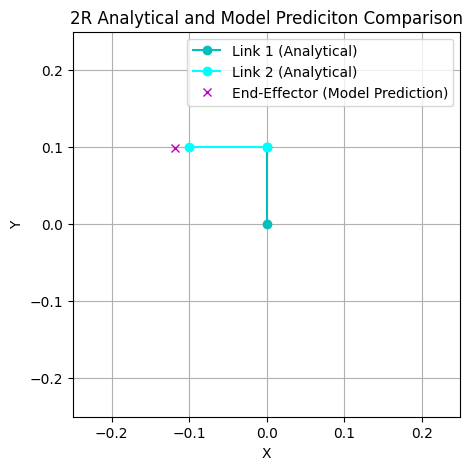

Distance error: 0.018325967237647355

Example with (j0, j1) = (1.5707963267948966, 0.7853981633974483)
End-effector predicted X-position: -0.07415185868740082
End-effector predicted Y-position: 0.17867155373096466


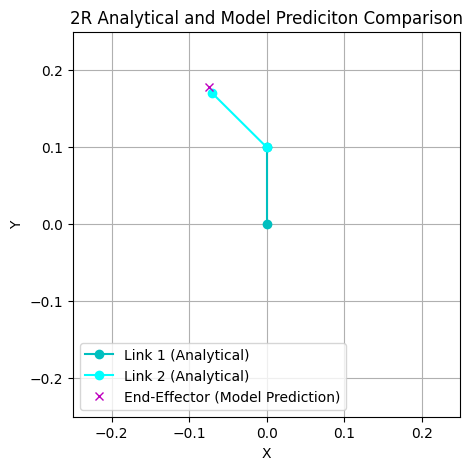

Distance error: 0.008672788722284549



In [12]:
model_2R = MODELS_2R[0].model
name_2R = MODELS_2R[0].get_name()

if 'raw' in name_2R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0), (np.pi/2, np.pi/2), (np.pi/2, np.pi/4)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred = FK(model_2R, theta, raw)
    print(f"Example with (j0, j1) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    result_model = FK(model_2R, theta, raw)  
    dispFK_2R(result_model, theta, display_error=True)

In [13]:
theta = [np.pi/4, np.pi/2]  

learned_J = FK_Jacobian_pred(model_2R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

analytical_J = FK_Jacobian_analytic_2R(theta)
print(f"Jacobian Matrix analytical:\n{learned_J}")

Jacobian Matrix predicted:
[[-0.15558755 -0.07947139]
 [ 0.00762274 -0.06966531]]
Jacobian Matrix analytical:
[[-0.15558755 -0.07947139]
 [ 0.00762274 -0.06966531]]


### 2.2) 3R robot

Example with (j0, j1, j2) = (0, 0, 0)
End-effector predicted X-position: 0.33319032192230225
End-effector predicted Y-position: 0.04438701272010803


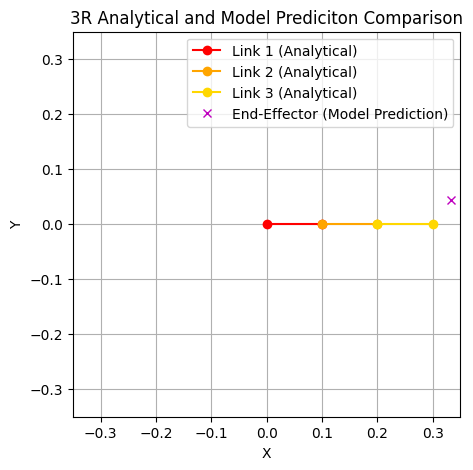

Distance error: 0.055423860994350496

Example with (j0, j1, j2) = (0.7853981633974483, 0.7853981633974483, 0.7853981633974483)
End-effector predicted X-position: -0.02396979182958603
End-effector predicted Y-position: 0.24979500472545624


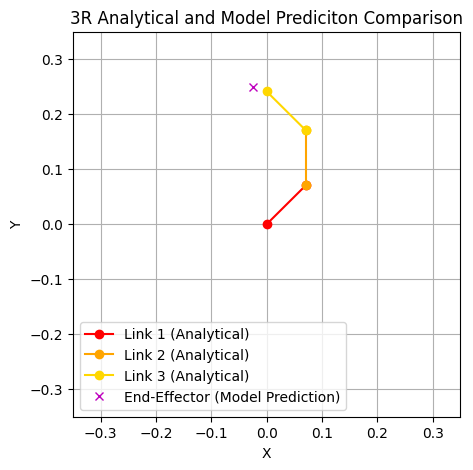

Distance error: 0.02539033102101529

Example with (j0, j1, j2) = (0, 1.5707963267948966, 1.5707963267948966)
End-effector predicted X-position: -0.005396217107772827
End-effector predicted Y-position: 0.11002060770988464


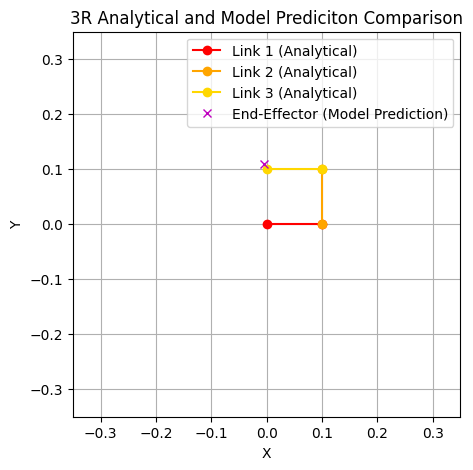

Distance error: 0.011381201076758959



In [14]:
model_3R = MODELS_3R[0].model
name_3R = MODELS_3R[0].get_name()

if 'raw' in name_3R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0, 0), (np.pi/4, np.pi/4, np.pi/4), (0, np.pi/2, np.pi/2)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred = FK(model_3R, theta, raw)
    print(f"Example with (j0, j1, j2) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    result_model = FK(model_3R, theta, raw)  
    dispFK_3R(result_model, theta, display_error=True)


In [15]:
theta = [np.pi/4, np.pi/5, np.pi/4]  

learned_J = FK_Jacobian_pred(model_3R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

analytical_J = FK_Jacobian_analytic_3R(theta)
print(f"Jacobian Matrix analytical:\n{analytical_J}")


Jacobian Matrix predicted:
[[-0.23748752 -0.29794756 -0.29028213]
 [-0.21974647 -0.0294013  -0.24070877]]
Jacobian Matrix analytical:
[[-0.25038121 -0.17967053 -0.0809017 ]
 [ 0.0275756  -0.04313508 -0.05877853]]


### 2.3) 5R robot

In [16]:
model_5R = MODELS_5R[0].model
name_5R = MODELS_5R[0].get_name()

if 'raw' in name_5R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0, 0, 0, 0), (np.pi/4, np.pi/4, np.pi/4, np.pi/4, -np.pi/2)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred, ee_z_pred = FK(model_5R, theta, raw)
    print(f"Example with (j0, j1, j2, j3, j4) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    print(f"End-effector predicted Z-position: {ee_z_pred}")
    print("\n")

Example with (j0, j1, j2, j3, j4) = (0, 0, 0, 0, 0)
End-effector predicted X-position: 0.034978047013282776
End-effector predicted Y-position: 0.015369459986686707
End-effector predicted Z-position: 0.5749963521957397


Example with (j0, j1, j2, j3, j4) = (0.7853981633974483, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483, -1.5707963267948966)
End-effector predicted X-position: 0.12226639688014984
End-effector predicted Y-position: 0.2240733504295349
End-effector predicted Z-position: 0.1296674758195877




## III - Global Mean Absolute Error (MAE)

In [17]:
theta = [np.pi/4, np.pi/2, np.pi/4, np.pi/4, np.pi/4]  

learned_J = FK_Jacobian_pred(model_5R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

Jacobian Matrix predicted:
[[-0.1292471  -0.02062525 -0.08540653 -0.06472258  0.07740659]
 [ 0.27042064 -0.11294779 -0.22144416 -0.16849309 -0.09380782]
 [ 0.00982136 -0.02907878 -0.0624996   0.0077085   0.08637785]]


### 3.1) 2R robot

In [18]:
theta_values = np.linspace(0, 2*np.pi, 50)

for model in MODELS_2R:
    model_2R = model.model
    name_2R =  model.get_name()

    mae_values = []
    for j0 in theta_values:
        for j1 in theta_values:
            theta = [j0, j1]

            learned_J = FK_Jacobian_pred(model_2R, theta, raw)
            analytical_J = FK_Jacobian_analytic_2R(theta)

            mae = (np.linalg.norm(learned_J - analytical_J))
            mae_values.append(mae)

    global_mae = np.mean(mae_values)
    print(f"Model: '{name_2R[:-6]}' Global MAE: {global_mae}")

Model: 'NN1_2R_p10_e20' Global MAE: 0.07004714757204056


### 3.2) 3R robot

In [19]:
theta_values = np.linspace(0, 2*np.pi, 12)

for model in MODELS_3R:
    model_3R = model.model
    name_3R =  model.get_name()

    mae_values = []
    for j0 in theta_values:
        for j1 in theta_values:
            for j2 in theta_values:
                theta = [j0, j1, j2]

                learned_J = FK_Jacobian_pred(model_3R, theta, raw)
                analytical_J = FK_Jacobian_analytic_3R(theta)

                mae = (np.linalg.norm(learned_J - analytical_J))
                mae_values.append(mae)

    global_mae = np.mean(mae_values)
    print(f"Model '{name_3R[:-6]}' Global MAE: {global_mae}")

Model 'NN1_3R_p10_e20' Global MAE: 0.18121464550495148
